In [44]:
import numpy as np
import util as u
import matplotlib.pyplot as plt

In [2]:
"""
first generate circle and fill it with constant color -- initial image
next construct the intensity functional and see if convergence occurs 
"""

'\nfirst generate circle and fill it with constant color -- initial image\nnext construct the intensity functional and see if convergence occurs \n'

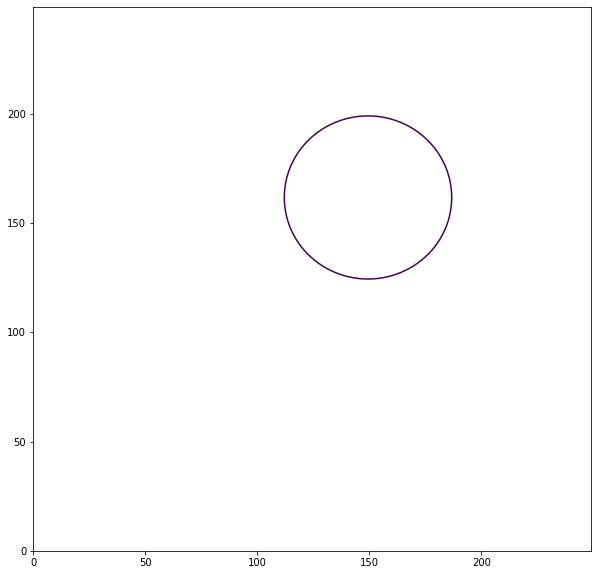

In [106]:
p = u.parabloid((250,250), xrad=0.3,yrad=0.3, left=0.2, top = 0.3)
u.showsurf(p, ls=True)

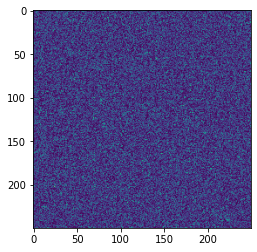

In [107]:
#now generate the thing 
def noise(image, mu=0, std = 0.1):
    def _noise():
        n = np.random.normal(mu, std, 1)[0]
        if n>1:
            _noise()
        else:
            return abs(n)
        
    im = image
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            #generate noise term 
            n = _noise()
            im[i,j]+= n
    
    return im

image = noise(np.ones(p.shape))
plt.imshow(image)
#note: we should add noise to the image before assigning the circle for testing later 

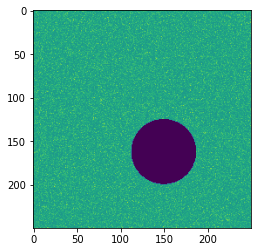

In [108]:
interior = list(zip(*np.where(p>=0)))
for pair in interior:
    image[pair[0], pair[1]] = 0.5
    
plt.imshow(image)

In [37]:
#don't forget how i defined these surfaces things lmao 
#note tho we're dealing with discrete grid so knowledge of the number of points is sufficient 

def _intensity(image, surface):
    
    #get points inside the contour 
    interior = list(zip(*np.where(surface>=0)))
    net = 0
    for pair in interior:
        net+=image[pair[0], pair[1]]
    
    return net

def _area(surface):
    interior = list(zip(*np.where(surface>=0)))
    
    return len(interior)+0.00001

def avg_intensity(image, surface):
    
    #get points inside the contour 
    interior = list(zip(*np.where(surface>=0)))
    net = 0
    for pair in interior:
        net+=image[pair[0], pair[1]]
    
    A = len(interior)+0.00001
    
    return net/A

#_intensity(image, p)/_area(p)

In [38]:
def iteration(surface, image, i0, dt=0.0001, alpha = 1, beta=1):
    d = lambda x,y: (x**2 + y**2)**0.5

    sy, sx = np.gradient(surface, np.linspace(-1,1, surface.shape[0]), np.linspace(-1,1, surface.shape[1]))

    #write logic for the time evolution of the curves 
    #surface curvature 
    K = u.mean_curvature(surface)

    #now the evolution function:
    F1 = K
    F2_num = 2*(avg_intensity(image, surface) - i0)*(_area(surface)*image - np.ones(image.shape)*_intensity(image, surface))
    F2_denom = _area(surface)**2
    F2 = F2_num/F2_denom
    
    surface = surface - (beta*F2+alpha*F1)*d(sx,sy)*dt
    
    return surface

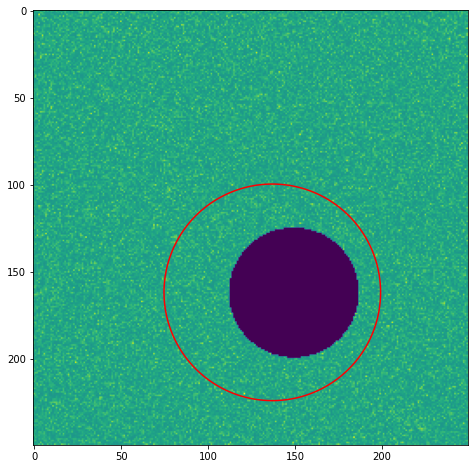

In [129]:
p = u.parabloid(image.shape, xrad = 0.5, yrad = 0.5, left=0.1, top=0.3)

plt.figure(figsize=(8,8))
plt.contour(p, [0], colors=['red'])
plt.imshow(image)

In [ ]:
surface = p
i0 = 0.5

i = 0
while True:
    surface = iteration(surface, image, i0, dt = 0.0015, beta=1000, alpha=0.01)
    if abs(avg_intensity(image,surface) - i0)/i0<0.02:
        print(f'{i}')
        break
    i+=1

plt.figure(figsize=(8,8))
plt.contour(surface, [0], colors=['red'])
plt.imshow(image)